In [1]:
# In this notebook I visualize the activity of a single regular neuron
# and compare it to a proposed Localized Gaussian Neuron

# dev work: dev - 2D Gaussian Contribution topology.ipynb

# also includes dev code of einsum computation for diagonal and full covariance matrixes


In [2]:
import numpy as np

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# scale of the heat maps
X1 = np.arange(-8,8.1, 0.1)
X2 = np.arange(-8,8.1, 0.1)
X1s, X2s = np.meshgrid(X1,X2)
inputs_heatmap = np.reshape(list(zip(X1s.flatten(),X2s.flatten())),(-1,2))
print("shape of heatmap", np.shape(inputs_heatmap))
# print(inputs_heatmap)

shape of heatmap (25921, 2)


In [5]:
### Part 1 - Spherical gaussian

In [6]:
# 1 - Draw a heat map of the classical neuron activity 
# notes: 2D neuron, so 2 inputs

In [7]:
# neuron parameters (weights, bias)
W = [-1, -2]
b = 5

In [8]:
# linear activity
l_activity = np.sum(W*inputs_heatmap, axis=1)+b
print("shape of activity", np.shape(l_activity))

shape of activity (25921,)


In [9]:
# WX+b = 0 line
zero_line = -(W[0]*X1+b)/W[1]

<IPython.core.display.Javascript object>


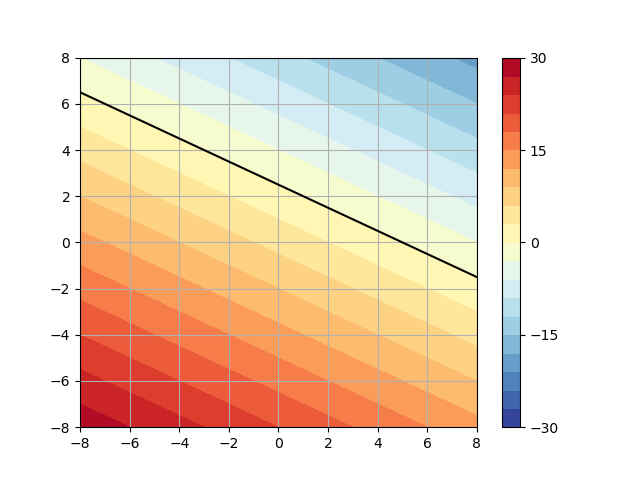

In [10]:
# plot linear activity

# compute range of activity
max_l_activity = np.max([np.abs(np.min(l_activity)),np.max(l_activity)])
# round up max activity to nearest log10
base = np.floor(np.log10(max_l_activity))
rounded_max = (10**base)*(np.ceil(max_l_activity/10**base))

levels = np.arange(-rounded_max, rounded_max+0.1, rounded_max/10)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(l_activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)


# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=ticks)
# show grid
plt.grid(True)
plt.show()

In [11]:
#### Properties
# rotate the gradient lines by modifying the ratio -W[0]/[1] 
# increase the range by changing the absolute value of W[i]

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


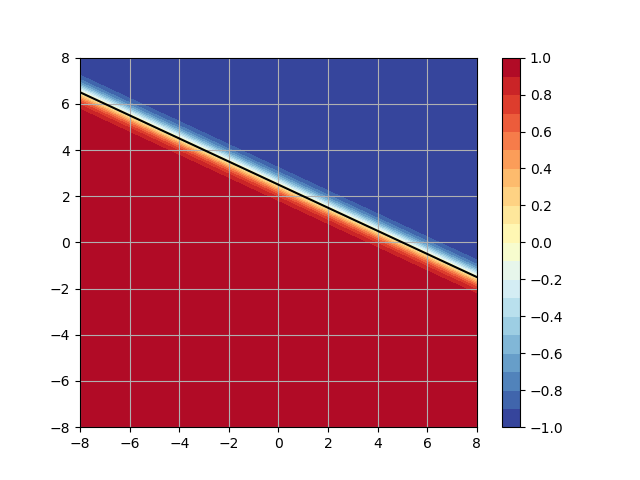

In [69]:
# activity post non-linearity 

tanh_l_activity = np.tanh(l_activity)

plt.contourf(X1s, X2s, np.reshape(tanh_l_activity, np.shape(X1s) ), levels=20, cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(-1,1.1, 0.2))
# show grid
plt.grid(True)
plt.show()

In [13]:
###  2 - draw the gaussian component heatmap

# radial parameters
center = [1, 2] # controls the center of gaussian (<=> bias of neuron)
sig = 5# controls the size of the gaussian

# the centers can be used to define the linear bias
b = -np.matmul(W,center)
print(b)

5


(25921,)


<IPython.core.display.Javascript object>


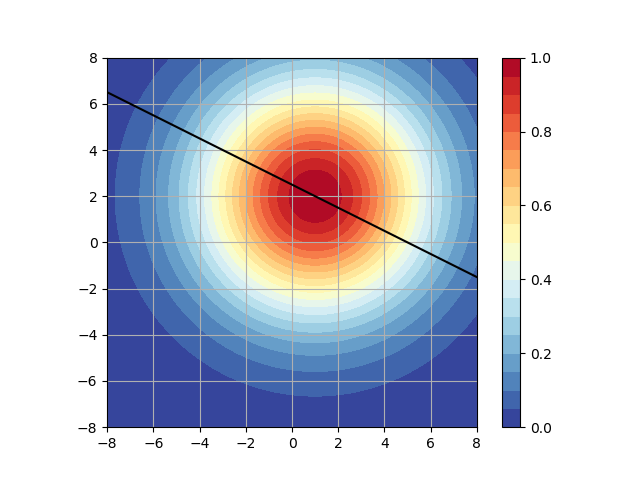

In [14]:
# heatmap gaussian activity 
g_activity = np.exp((-(1.0/sig)**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
print(g_activity.shape)

plt.contourf(X1s, X2s, np.reshape(g_activity, np.shape(X1s) ), levels=20, cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(0,1.1, 0.2))
# show grid
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

<IPython.core.display.Javascript object>


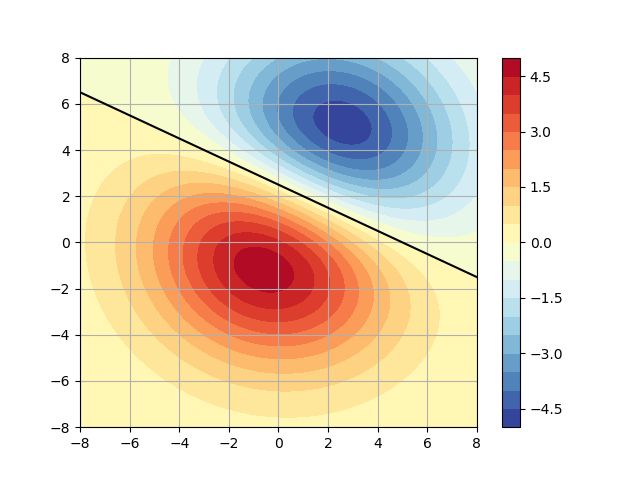

In [15]:
# 3 - combined heatmaps
plt.contourf(X1s, X2s, np.reshape(g_activity*l_activity, np.shape(X1s) ), levels=20, cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar()
# show grid
plt.grid(True)
plt.show()

In [16]:
### Part 2 - Variants

In [17]:
###  variant 1- decouple the neuron center from the linear 

# radial parameters
center_off = [0, 0] # controls the center of gaussian 
sig = 5 # controls the size of the gaussian

# WX+b = 0 line
zero_line = -(W[0]*X1+b)/W[1]

# heatmap radial activity 
g_activity_decoupled = np.exp((-(1.0/sig)**2) *  np.sum(np.square(inputs_heatmap-center_off), axis=1))

# overall heatmap activity
activity_decoupled = tanh_l_activity*g_activity_decoupled

<IPython.core.display.Javascript object>


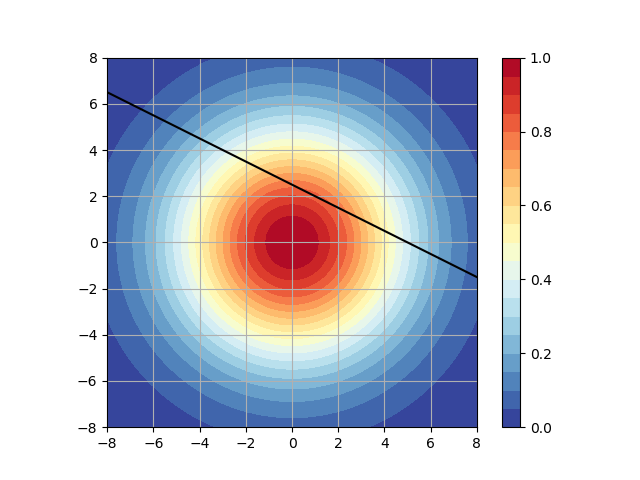

In [18]:
# plot the gaussian activity alone

plt.contourf(X1s, X2s, np.reshape(g_activity_decoupled, np.shape(X1s) ), levels=np.arange(0,1.05, 0.05), cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(0,1.1, 0.2))
# show grid
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

<IPython.core.display.Javascript object>


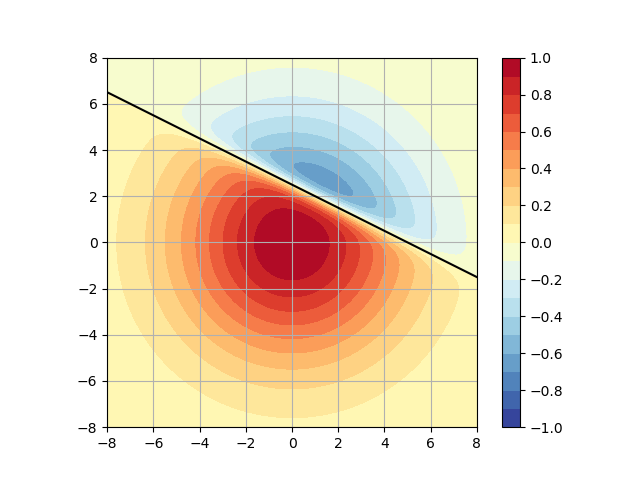

In [19]:
# plot the full FGN activity

plt.contourf(X1s, X2s, np.reshape(activity_decoupled, np.shape(X1s) ), levels=np.arange(-1,1.1, 0.1), cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(-1,1.1, 0.2))
# show grid
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

<IPython.core.display.Javascript object>


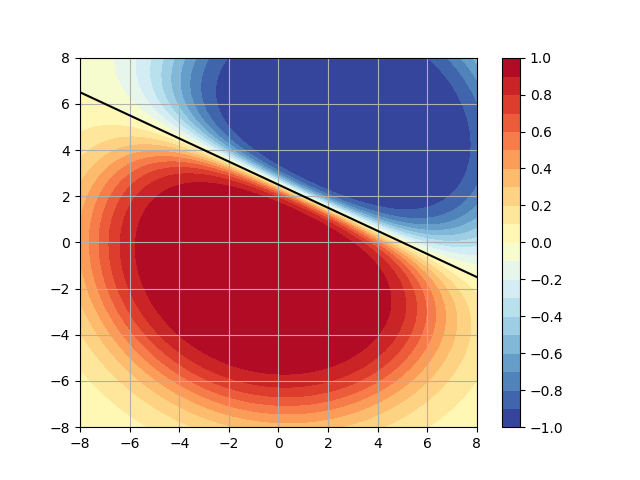

In [20]:
# variant 2 - apply tanh to combined activity

activity_tanh_post = np.tanh(g_activity*l_activity)

plt.contourf(X1s, X2s, np.reshape(activity_tanh_post, np.shape(X1s) ), levels=20, cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(-1,1.1, 0.2))
# show grid
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


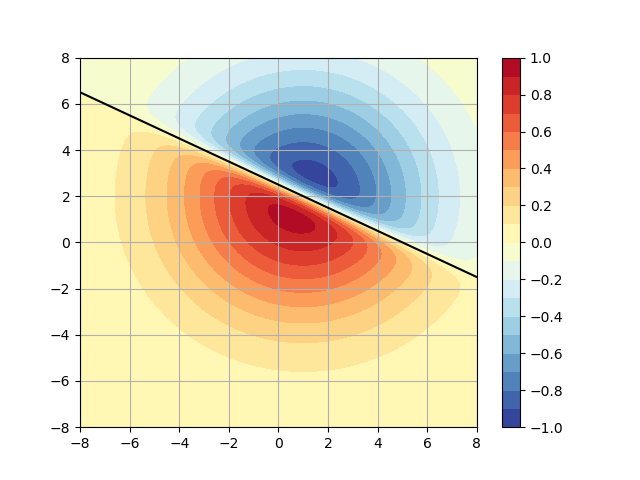

In [21]:
# variant 3 - apply tanh to linear before combining

activity_tanh_pre = np.tanh(l_activity)*g_activity

plt.contourf(X1s, X2s, np.reshape(activity_tanh_pre, np.shape(X1s) ), levels=20, cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(-1,1.1, 0.2))
# show grid
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


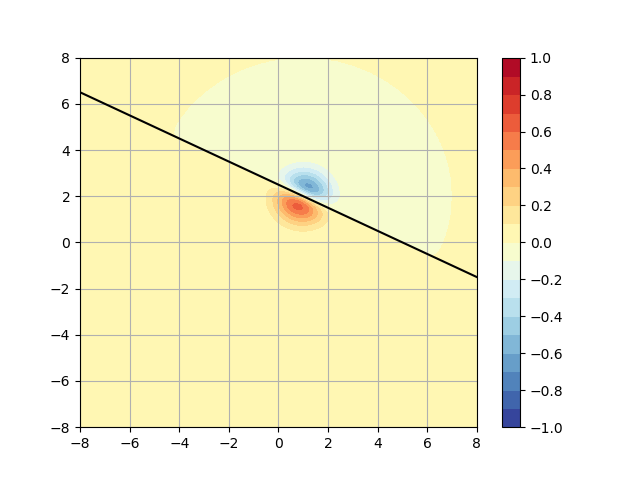

<IPython.core.display.Javascript object>


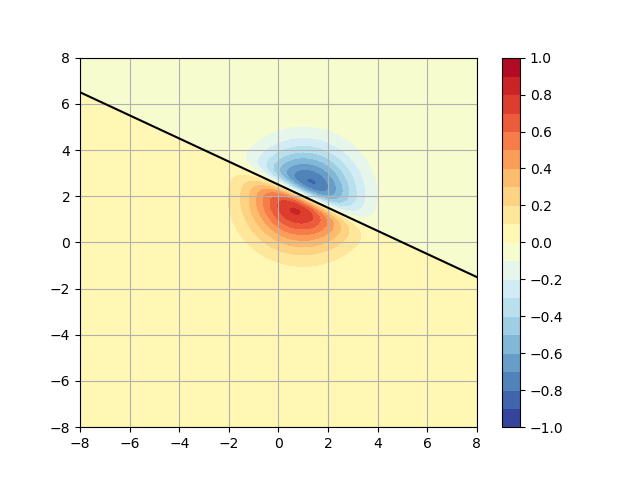

<IPython.core.display.Javascript object>


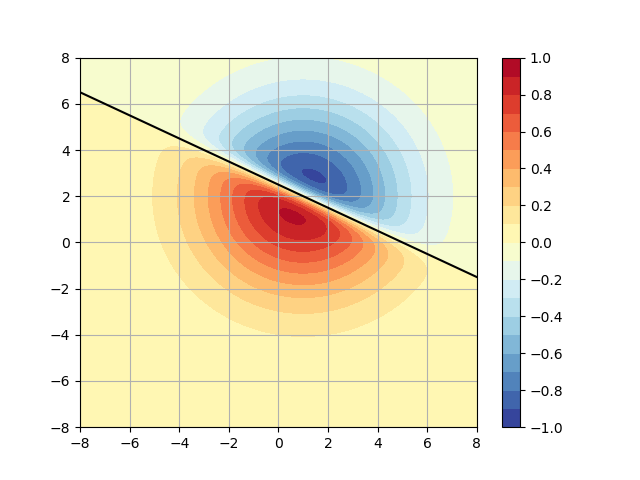

<IPython.core.display.Javascript object>


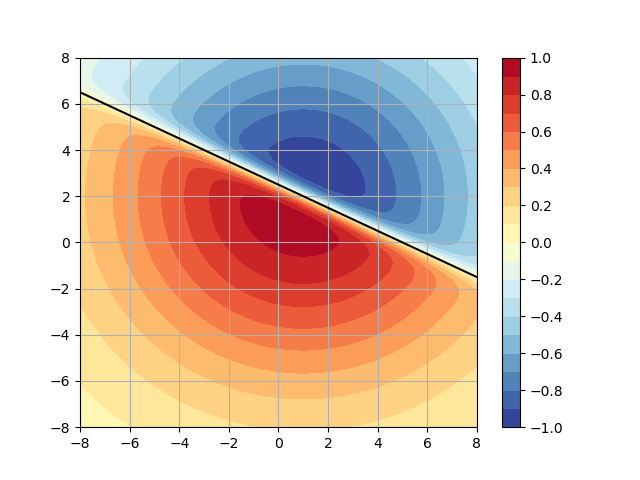

<IPython.core.display.Javascript object>


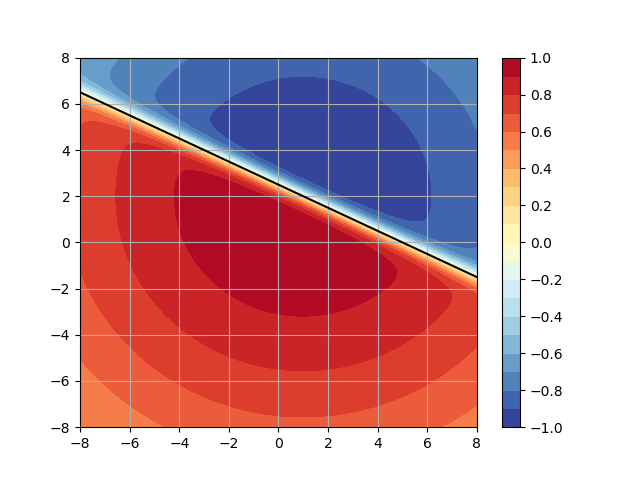

<IPython.core.display.Javascript object>


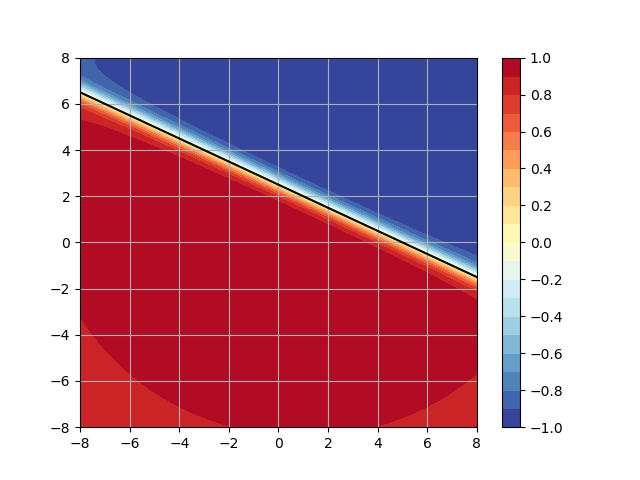

<IPython.core.display.Javascript object>


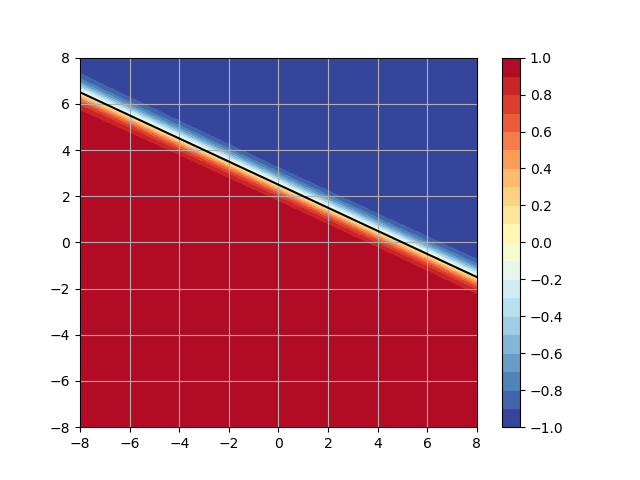

<IPython.core.display.Javascript object>


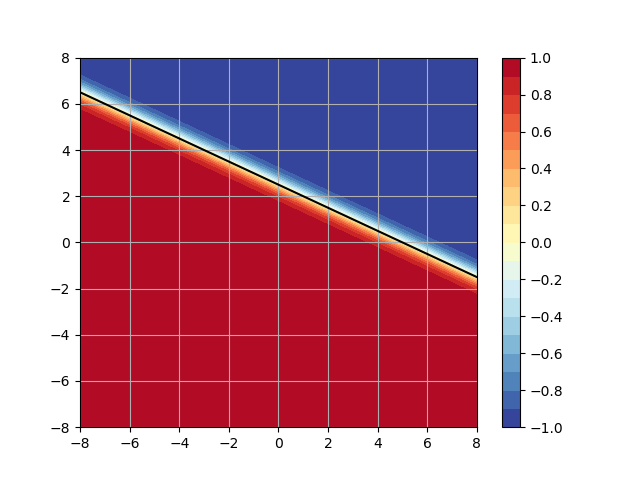

<IPython.core.display.Javascript object>


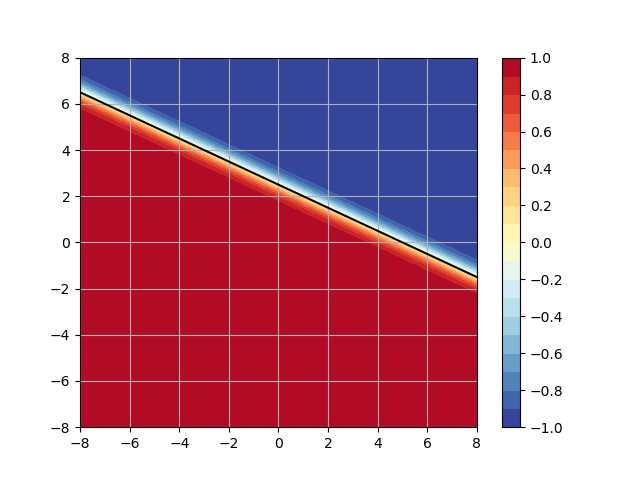

<IPython.core.display.Javascript object>


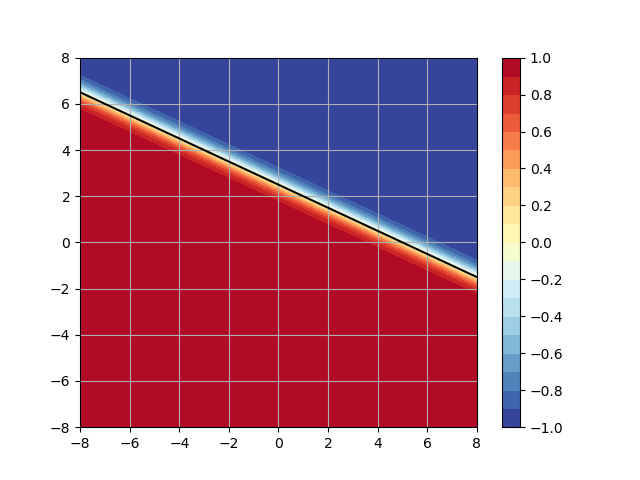

In [22]:
# Note: if sigma is large, and we apply the g_activity to the normal non-lin(l_activity)
# the behavior of the FGN approaches that of the classic neuron

for sig2 in [2**n for n in range(10)]:

    # heatmap radial activity 
    g_activity_s = np.exp((-1.0/sig2**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
    
    # plot the heatmap 
    plt.contourf(X1s, X2s, np.reshape(g_activity_s*tanh_l_activity, np.shape(X1s) ), levels=np.arange(-1,1.1, 0.1), cmap=cm.RdYlBu_r)
    
    # plot the zero line
    plt.plot(X1,zero_line, color='black')
    # reset axes
    plt.axis([-8,8, -8, 8])
    # add colorbar
    plt.colorbar(ticks=np.arange(-1,1.1, 0.2))
    # show grid
    plt.grid(True)
    plt.show()



In [23]:
### non-circular variants

<IPython.core.display.Javascript object>


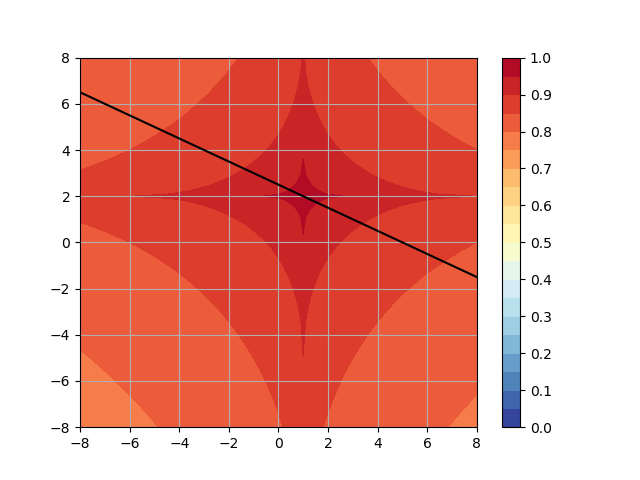

In [24]:
# norm based activity for stranger looking gaussian
# Note: if ord=2, same shape as above
# if ord=1, diamond shape
# as ord goes to float('inf'), approaches a square (Manhattan dist)
# as ord go to 0, concave diamond shape
# as ord lower, the region of high activity is higher?

ord=float(0.5)
# g_activity_ord = np.exp((-1.0/sig**2) * np.linalg.norm(inputs_heatmap-center, ord=ord, axis=1) )
# manual computation (probably not as optimized as numpy but doesn't have to involve **(1.0/ord))
g_activity_ord = np.exp((-1.0/sig**2) * np.sum(np.abs(inputs_heatmap-center)**ord, axis=1))

# plot the gaussian activity alone
plt.contourf(X1s, X2s, np.reshape(g_activity_ord, np.shape(X1s) ), levels=np.arange(0,1.05, 0.05), cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(0,1.1, 0.1))
# show grid
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


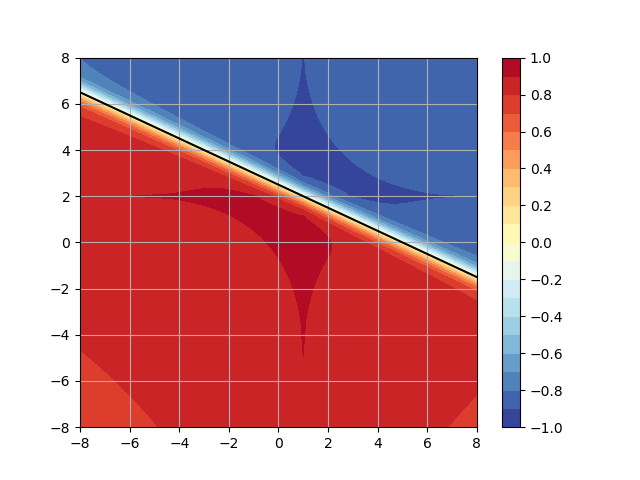

In [25]:
activity_ord = np.tanh(l_activity)*g_activity_ord

plt.contourf(X1s, X2s, np.reshape(activity_ord, np.shape(X1s) ), levels=np.arange(-1,1.1, 0.1), cmap=cm.RdYlBu_r)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# reset axes
plt.axis([-8,8, -8, 8])
# add colorbar
plt.colorbar(ticks=np.arange(-1,1.1, 0.2))
# show grid
plt.grid(True)
plt.show()

In [26]:
### Part 2 - diagonal covariance matrix math

In [27]:
# diagonal covariance matrix, represented as a vector
cov = np.array([50,1])
print(cov)

# inverse 
inv_cov = 1.0/cov
print(inv_cov)

[50  1]
[0.02 1.  ]


In [28]:
# heatmap radial activity 
d = inputs_heatmap-center
# print(d.shape)
# de = np.matmul(d,np.linalg.inv(sig_mat))
# print(de.shape)
# ded = np.einsum('ij,ij->i', de, d)
# print(ded.shape)
ded = np.einsum('ij,ij->i', d/cov, d)
g_activity_diag = np.exp(-ded)
print(g_activity_diag.shape)

(25921,)


/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


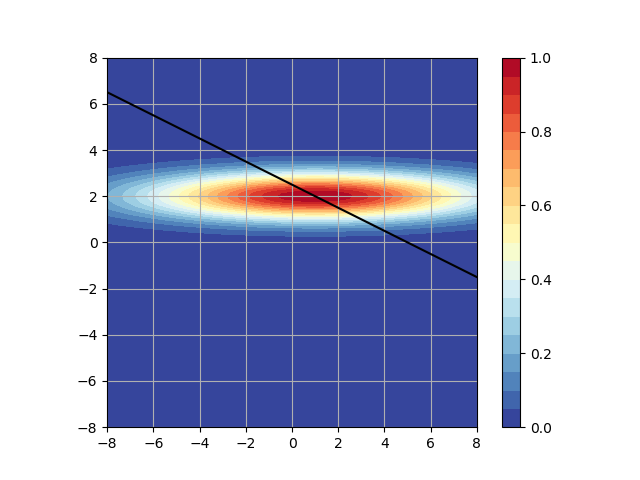

In [29]:
# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

plt.contourf(X1s, X2s, np.reshape(g_activity_diag, np.shape(X1s) ), levels=np.arange(0,1.05, 0.05), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=np.arange(0,1.1, 0.2))

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

In [30]:
# overall heatmap activity
activity_diag = tanh_l_activity* g_activity_diag
max_act = np.max(abs(activity_diag))

print(max_act)

0.8945492000066282


/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


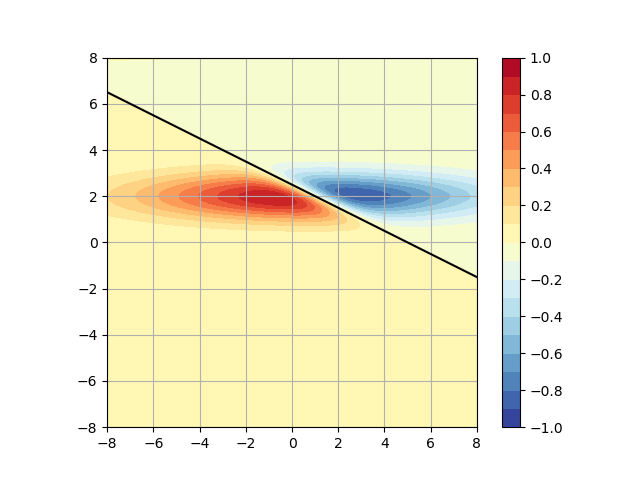

In [31]:
# plot the heatmap 

# plot the zero line
plt.plot(X1,zero_line, color='black')

plt.contourf(X1s, X2s, np.reshape(activity_diag, np.shape(X1s) ), levels=np.arange(-1,1.05, 0.1), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=np.arange(-1,1.1, 0.2))

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

In [32]:
### Part 3 - full covariance matrix

In [33]:
# covariance matrix
sig_mat = np.array([[0.5, 2],[6,10]])
# make positive definite
sig_mat = 0.5*(sig_mat+sig_mat.T)+2.0*np.eye(2)
# sig_mat = np.array([sig_mat, 10.0*sig_mat]) # to test multiple neurons
print(sig_mat.shape)
print(sig_mat)

(2, 2)
[[ 2.5  4. ]
 [ 4.  12. ]]


In [34]:
# heatmap radial activity 
d = inputs_heatmap-center
print(d.shape)
de = np.matmul(d,np.linalg.inv(sig_mat))
print(de.shape)
# obfuscated but quick way of taking he diag of ded
ded = np.einsum('ij,ij->i', de, d)
# # to test multiple neurons
# ded = np.einsum('ijk,jk->ij', de, d)

print(ded.shape)
r_activity_full = np.exp(-ded)
print(r_activity_full.shape)

(25921, 2)
(25921, 2)
(25921,)
(25921,)


/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


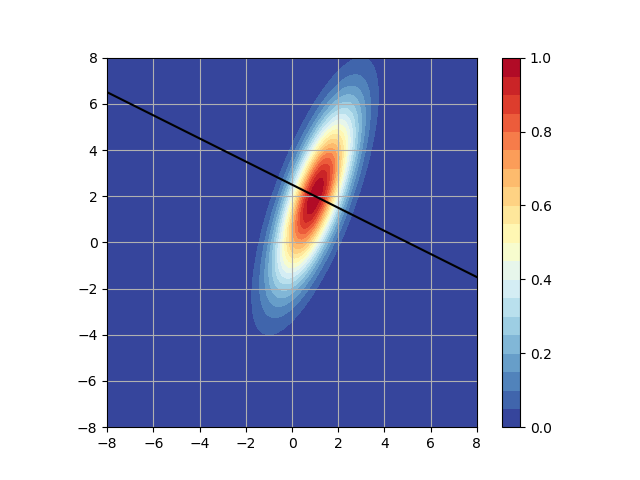

In [35]:
# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

plt.contourf(X1s, X2s, np.reshape(r_activity_full, np.shape(X1s) ), levels=np.arange(0,1.05, 0.05), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=np.arange(0,1.1, 0.2))

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

In [36]:
# overall heatmap activity
activity_full =tanh_l_activity*r_activity_full
max_act = np.max(abs(activity_full))

print(max_act)

0.9071083266781041


/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


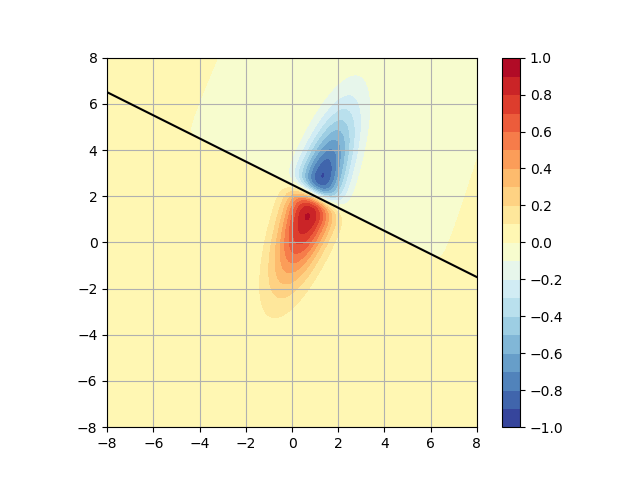

In [37]:
# plot the heatmap 

# plot the zero line
plt.plot(X1,zero_line, color='black')
plt.contourf(X1s, X2s, np.reshape(activity_full, np.shape(X1s) ), levels=np.arange(-1,1.05, 0.1), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=np.arange(-1,1.1, 0.2))

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()

In [38]:
### Extra 1 - dev of einsum math for batch_size * num_neurons * input dim
# with multiple centers and neurons

In [39]:
batch_size = inputs_heatmap.shape[0]
num_neurons = 3
input_dim = inputs_heatmap.shape[1]
print(batch_size, num_neurons, input_dim)

25921 3 2


In [40]:
centers = np.array([5.0*np.random.rand(input_dim) for x in range(num_neurons)])
print(centers.shape)
print(centers)

(3, 2)
[[2.99756319 1.7522707 ]
 [4.36174923 4.07588794]
 [1.30872896 0.97030157]]


In [41]:
print(centers.shape)
print(inputs_heatmap.shape)
print(np.expand_dims(a=inputs_heatmap,axis=1).shape)

distances = np.expand_dims(a=inputs_heatmap,axis=1)-centers
print(distances.shape)

# space saving method of computing distances

(3, 2)
(25921, 2)
(25921, 1, 2)
(25921, 3, 2)


In [42]:
### diagonal covar
covar_matrixes = 10.0*np.array([np.random.rand(input_dim) for x in range(num_neurons)])
inv_covar_matrixes = 1.0/covar_matrixes
print(covar_matrixes.shape)
print(covar_matrixes)
print(inv_covar_matrixes.shape)
print(inv_covar_matrixes)

(3, 2)
[[4.75069309 6.98382483]
 [3.98915997 3.47823882]
 [7.34177243 8.45627936]]
(3, 2)
[[0.2104956  0.14318801]
 [0.25067934 0.28750182]
 [0.13620689 0.11825532]]


In [43]:
# check inv
for n in range(len(covar_matrixes)):
    print(covar_matrixes[n])
    print(inv_covar_matrixes[n])
    print(covar_matrixes[n]*inv_covar_matrixes[n])

[4.75069309 6.98382483]
[0.2104956  0.14318801]
[1. 1.]
[3.98915997 3.47823882]
[0.25067934 0.28750182]
[1. 1.]
[7.34177243 8.45627936]
[0.13620689 0.11825532]
[1. 1.]


In [44]:
print(inv_covar_matrixes)
print()
print(inv_covar_matrixes**2)
print()
print(np.einsum('ij,ij->ij', inv_covar_matrixes, inv_covar_matrixes))

[[0.2104956  0.14318801]
 [0.25067934 0.28750182]
 [0.13620689 0.11825532]]

[[0.0443084  0.02050281]
 [0.06284013 0.0826573 ]
 [0.01855232 0.01398432]]

[[0.0443084  0.02050281]
 [0.06284013 0.0826573 ]
 [0.01855232 0.01398432]]


In [45]:
# seems like no speed up at all
ein_path = np.einsum_path('...ij, ...ij, ...ij->...i', distances, covar_matrixes, distances, optimize='optimal')
for p in ein_path:
    print(p)
    
### this is black magic
# ded = np.einsum('...ij,...ij->...i', distances/covar_matrixes, distances)
ded = np.einsum('zij,zij->zi', distances*inv_covar_matrixes, distances)
ded2= np.einsum('zij, ij, zij->zi', distances, inv_covar_matrixes, distances)

print(np.max(np.abs(ded-ded2)))

r_activity_full = np.exp(-ded)
print("full", r_activity_full.shape)

['einsum_path', (0, 1), (0, 1)]
  Complete contraction:  qij,ij,qij->qi
         Naive scaling:  3
     Optimized scaling:  3
      Naive FLOP count:  4.666e+05
  Optimized FLOP count:  4.666e+05
   Theoretical speedup:  1.000
  Largest intermediate:  1.555e+05 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   3                 ij,qij->jiq                              qij,jiq->qi
   3                 jiq,qij->qi                                   qi->qi
0.0
full (25921, 3)


In [46]:
# # space saving computation
# distances2 = np.array([np.sum((x-centers)**2, axis=1) for x in inputs_heatmap])
# print(distances2.shape)
# ded2 = np.einsum('ai, ib -> ai', distances2, inv_covar_matrixes**2)
# print(ded2.shape)
# r_activity_full2 = np.exp(-ded2)

# space saving computation
ded2 = np.array([np.sum(((x-centers)**2)*inv_covar_matrixes, axis=1) for x in inputs_heatmap])
print(ded2.shape)
r_activity_full2 = np.exp(-ded2)

(25921, 3)


In [47]:
print(r_activity_full)
print()
print(r_activity_full2)
print()
print(np.max(np.abs(r_activity_full2-r_activity_full)))

[[1.06941392e-17 1.43033212e-35 5.51583525e-10]
 [1.69552689e-17 2.65160975e-35 7.09821702e-10]
 [2.67691874e-17 4.89108208e-35 9.10970227e-10]
 ...
 [2.91235802e-05 6.17047526e-04 9.32251523e-06]
 [2.37424561e-05 5.18043682e-04 7.80090090e-06]
 [1.92742809e-05 4.32749699e-04 6.50988539e-06]]

[[1.06941392e-17 1.43033212e-35 5.51583525e-10]
 [1.69552689e-17 2.65160975e-35 7.09821702e-10]
 [2.67691874e-17 4.89108208e-35 9.10970227e-10]
 ...
 [2.91235802e-05 6.17047526e-04 9.32251523e-06]
 [2.37424561e-05 5.18043682e-04 7.80090090e-06]
 [1.92742809e-05 4.32749699e-04 6.50988539e-06]]

2.220446049250313e-16


/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


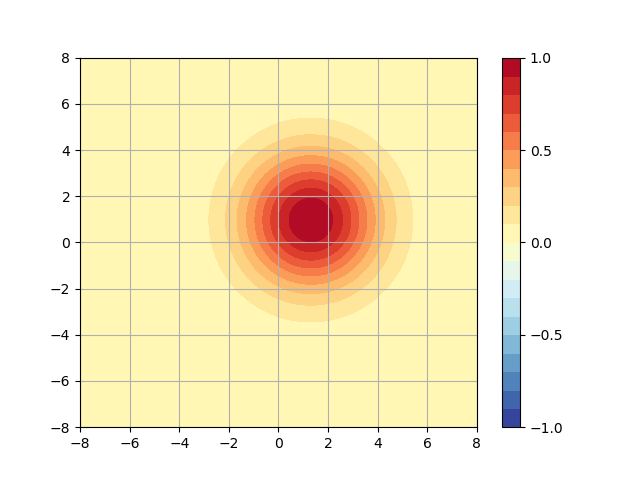

In [48]:
# plot the gaussian activity alone
r_activity_n = r_activity_full[:,2]
levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity_n, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [49]:
%%timeit 
np.array([np.sum(((x-centers)**2)*inv_covar_matrixes, axis=1) for x in inputs_heatmap])

1.87 s ± 361 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit
distances = np.expand_dims(a=inputs_heatmap,axis=1)-centers
ded2= np.einsum('zij, ij, zij->zi', distances, inv_covar_matrixes , distances)

19.7 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
### 1.5 full cov matrix

In [52]:
half_covar_matrix = 10.0*np.array([np.random.rand(input_dim,input_dim) for x in range(num_neurons)])
print("half covar", half_covar_matrix.shape)
print(half_covar_matrix)

covar_matrixes = np.matmul(half_covar_matrix,np.transpose(half_covar_matrix,axes=(0,2,1)))
print("full covar", covar_matrixes.shape)
print(covar_matrixes)
# make symmetric positive definite (old method)
# covar_matrixes = 0.5*(covar_matrixes+np.transpose(covar_matrixes,axes=(0,2,1)))
# covar_matrixes = covar_matrixes + 2.0*np.array([np.eye(input_dim) for _ in range(num_neurons)])
# covar_matrixes = 10.0*covar_matrixes
# covar_matrixes = 0.5*(covar_matrixes+covar_matrixes.T)+2.0*np.eye(input_dim)

# print(covar_matrixes.shape)
# print(covar_matrixes[0])

half covar (3, 2, 2)
[[[2.15346164 1.56564199]
  [8.1460041  1.04336392]]

 [[4.77161903 0.29727836]
  [6.96641745 6.00157706]]

 [[2.14145824 7.50284485]
  [7.23484084 7.249019  ]]]
full covar (3, 2, 2)
[[[  7.08863187  19.17564171]
  [ 19.17564171  67.44599107]]

 [[ 22.85672258  35.02522905]
  [ 35.02522905  84.54989935]]

 [[ 60.87852421  69.88137434]
  [ 69.88137434 104.89119834]]]


In [53]:
# inverse 
inv_covar_matrixes = np.linalg.inv(covar_matrixes)
print("inverse", inv_covar_matrixes.shape)
print(inv_covar_matrixes)

# check that prod is identity
for n in range(num_neurons):
    print("neuron", n)
    print(np.matmul(inv_covar_matrixes[n],covar_matrixes[n]))

inverse (3, 2, 2)
[[[ 0.6109539  -0.17370096]
  [-0.17370096  0.06421178]]

 [[ 0.11979861 -0.04962719]
  [-0.04962719  0.03238565]]

 [[ 0.06982436 -0.04651889]
  [-0.04651889  0.04052584]]]
neuron 0
[[1. 0.]
 [0. 1.]]
neuron 1
[[1. 0.]
 [0. 1.]]
neuron 2
[[1.0000000e+00 0.0000000e+00]
 [4.4408921e-16 1.0000000e+00]]


In [54]:
# use A=B*B' method to store covar matrix
# then inv(A) = inv(B')*inv(B) = inv(B)' * inv(B)
# inv_half1_covar_matrix = np.linalg.inv(np.transpose(half_covar_matrix,axes=(0,2,1)))
inv_half2_covar_matrix = np.linalg.inv(half_covar_matrix)
inv_half1_covar_matrix = np.transpose(inv_half2_covar_matrix,axes=(0,2,1))

# this is just matrix mul for each neuron
inv_covar_matrixes_2 = np.einsum('zij,zkj->zik', inv_half1_covar_matrix, inv_half1_covar_matrix)
print(inv_covar_matrixes_2.shape)
print(inv_covar_matrixes_2)

# check that prod is identity
for n in range(num_neurons):
    print("neuron", n)
    print(np.matmul(inv_covar_matrixes_2[n],covar_matrixes[n]))
    
# check that  inv_covar_matrixes_2 == invinv_covar_matrixes
print("comparison")
print(np.max(inv_covar_matrixes_2-inv_covar_matrixes))

(3, 2, 2)
[[[ 0.6109539  -0.17370096]
  [-0.17370096  0.06421178]]

 [[ 0.11979861 -0.04962719]
  [-0.04962719  0.03238565]]

 [[ 0.06982436 -0.04651889]
  [-0.04651889  0.04052584]]]
neuron 0
[[ 1.00000000e+00 -1.77635684e-15]
 [-4.44089210e-16  1.00000000e+00]]
neuron 1
[[ 1.00000000e+00 -1.77635684e-15]
 [-4.44089210e-16  1.00000000e+00]]
neuron 2
[[ 1.0000000e+00  8.8817842e-16]
 [-4.4408921e-16  1.0000000e+00]]
comparison
8.881784197001252e-16


In [55]:
# method 1: use inv_covar matrix
# seems like no speed up at all
ein_path_1 = np.einsum_path('...i,...ik,...k->...',
                          distances, inv_covar_matrixes,  distances,
                          optimize=True)
print("method 1")
for p in ein_path_1:
    print(p)

method 1
['einsum_path', (0, 1), (0, 1)]
  Complete contraction:  sqi,qik,sqk->sq
         Naive scaling:  4
     Optimized scaling:  4
      Naive FLOP count:  9.332e+05
  Optimized FLOP count:  9.332e+05
   Theoretical speedup:  1.000
  Largest intermediate:  1.555e+05 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                qik,sqi->kqs                              sqk,kqs->sq
   3                 kqs,sqk->sq                                   sq->sq


In [56]:
%%timeit 
np.einsum('...i,...ik,...k->...',
                          distances, inv_covar_matrixes,  distances)

46.7 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
%%timeit 
np.einsum('Lzi,zik,Lzk->Lz',
                          distances, inv_covar_matrixes,  distances, optimize=ein_path_1[0])

63 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
# method 2, use half_inv_covar ...ij,...jk->...ki
# potentially some speedup, but timeit doesn't show any
ein_path_2 = np.einsum_path('...i,...ij,...jk,...k->...',
                          distances, inv_half1_covar_matrix, inv_half2_covar_matrix,  distances,
                          optimize=True)
print()
print("method 2")
for p in ein_path_2:
    print(p)


method 2
['einsum_path', (1, 2), (0, 2), (0, 1)]
  Complete contraction:  sqi,qij,qjk,sqk->sq
         Naive scaling:  5
     Optimized scaling:  4
      Naive FLOP count:  2.488e+06
  Optimized FLOP count:  9.332e+05
   Theoretical speedup:  2.667
  Largest intermediate:  1.555e+05 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                qjk,qij->ikq                          sqi,sqk,ikq->sq
   4                ikq,sqi->kqs                              sqk,kqs->sq
   3                 kqs,sqk->sq                                   sq->sq


In [59]:
### manual computation
# # for every input in batch
# ded = np.zeros(a*b).reshape(a,b)
# for ai in range(a):
#     # for every neuron
#     for bi in range(b):
# #         de =   np.matmul(distances[ai,bi,:], inv_covar_matrixes[bi,:,:])
# #         ded[ai,bi] = np.matmul(de, np.transpose(distances[ai,bi,:]))
#         ded[ai,bi] = np.einsum('i,ik,k->', distances[ai,bi,:], inv_covar_matrixes[bi,:,:],  distances[ai,bi,:])

### this is black magic
print(distances.shape)
print(inv_covar_matrixes.shape)
# method 1
ded1 = np.einsum('xzi,zik,xzk->xz', distances, inv_covar_matrixes,  distances, optimize=ein_path_1[0])

# method 2
ded2 = np.einsum('xzi,zij,zkj,xzk->xz',
                distances, inv_half1_covar_matrix, inv_half1_covar_matrix,  distances,
                optimize=ein_path_2[0])


# check that they are the same
print("ded1", ded1.shape)
print("ded2", ded2.shape)

print(np.max(np.abs(ded1-ded2)))

# print(torch.matmul(de[0], d.transpose(0,1)))
r_activity_full1 = np.exp(-ded1)
r_activity_full2 = np.exp(-ded2)

print("full", r_activity_full2.shape)
# print(r_activity_full2)

(25921, 3, 2)
(3, 2, 2)
ded1 (25921, 3)
ded2 (25921, 3)
1.5631940186722204e-13
full (25921, 3)


In [60]:
%%timeit 
np.einsum('xzi,zij,zjk,xzk->xz',
                distances, inv_half1_covar_matrix, inv_half2_covar_matrix,  distances,
                optimize=ein_path_2[0])

61.9 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%%timeit 
np.einsum('xzi,zij,zjk,xzk->xz',
                distances, inv_half2_covar_matrix, inv_half1_covar_matrix,  distances)

The slowest run took 4.64 times longer than the fastest. This could mean that an intermediate result is being cached.
78.1 ms ± 33.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
# computation of trace of inverse
# method 1
path1 =  np.einsum_path('...ii->', inv_covar_matrixes, optimize=True)
for p in path1:
    print(p)
inv_trace1 = np.einsum('zii->', inv_covar_matrixes, optimize=path1[0])
print(inv_trace1.shape)
print(inv_trace1)

# method 2
print()
path2 =  np.einsum_path('...ik,...ik->', inv_half1_covar_matrix, inv_half1_covar_matrix, optimize=True)
for p in path2:
    print(p)
inv_trace2 = np.einsum('zik,zik->', inv_half1_covar_matrix, inv_half1_covar_matrix, optimize=path2[0])
print(inv_trace2.shape)
print(inv_trace2)

# check
s = 0
for i in range(3):
    s+= np.sum(np.diag(inv_covar_matrixes[i]))
    print(np.sum(np.diag(inv_covar_matrixes[i])))
print(s)

['einsum_path', (0,)]
  Complete contraction:  qii->
         Naive scaling:  2
     Optimized scaling:  2
      Naive FLOP count:  6.000e+00
  Optimized FLOP count:  1.300e+01
   Theoretical speedup:  0.462
  Largest intermediate:  1.000e+00 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   2                       qii->                                       ->
()
0.9377001547552225

['einsum_path', (0, 1)]
  Complete contraction:  qik,qik->
         Naive scaling:  3
     Optimized scaling:  3
      Naive FLOP count:  2.400e+01
  Optimized FLOP count:  2.500e+01
   Theoretical speedup:  0.960
  Largest intermediate:  1.000e+00 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------

In [63]:
%%timeit 
np.einsum('zii->z', np.matmul(inv_half1_covar_matrix,np.transpose(inv_half1_covar_matrix,(0,2,1)) ) )

The slowest run took 4.52 times longer than the fastest. This could mean that an intermediate result is being cached.
49.9 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [64]:
%%timeit
np.einsum('zik,zik->z', inv_half1_covar_matrix, inv_half1_covar_matrix)

The slowest run took 6.81 times longer than the fastest. This could mean that an intermediate result is being cached.
16.9 µs ± 6.84 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [65]:
# computation of trace
cov_trace = np.einsum('zii->z', covar_matrixes, optimize=['einsum_path', (0,)])
print(cov_trace)
# check
print(np.sum(np.diag(covar_matrixes[2])))

[ 74.53462294 107.40662193 165.76972255]
165.76972255331904


/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


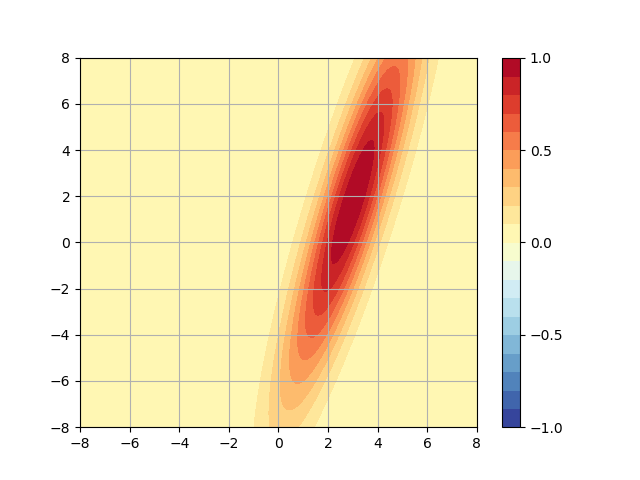

In [66]:
# plot the gaussian activity alone
r_activity_n = r_activity_full1[:,0]
levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity_n, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [67]:
### Extra 2

In [68]:
# # Useful: Test any Gaussian activity
# # combining circular gaussian with normal neuron
# # neuron parameters (weights, bias)
# W = [1,1]
# # b = 0 # bias defined by by the center of radial function

# # radial parameters
# center = [0, 0] # controls the center of gaussian (<=> bias of neuron)
# sig = 10 # controls the size of the gaussian
# b = -np.matmul(W,center)
# print(b)
# # new zero line
# zero_line = -(W[0]*X1+b)/W[1]

# # heatmap neuronal activity
# n_activity = np.sum(W*inputs_heatmap, axis=1)+b
# print(n_activity.shape)

# # heatmap radial activity 

# r_activity = np.exp((-1.0/sig**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
# print(r_activity.shape)

# # overall heatmap activity
# activity = n_activity*r_activity

# # TEST: activity of tanh(lin)*gaussian

# activity = np.tanh(n_activity)*r_activity

# # plot the zero line
# plt.plot(X1,zero_line, color='black')
# # plot the heatmap 
# levels = np.arange(-1,1.1, 0.1)
# # extend level to be inclusive on last level
# levels[-1]*=1.001
# ticks = levels[::5]


# plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

# plt.colorbar(ticks=ticks)
# #reset axes
# plt.axis([-8,8, -8, 8])
# plt.grid(True)
# plt.show()